# Aztec G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

## Perform Simulation

In [2]:
from aztec_gddt.scenario_experiments import scenario_group_1_experiment

N_TIMESTEPS = 300
N_SAMPLES = 1
N_CONFIG_SAMPLES = 8
RELEVANT_PER_TRAJECTORY_METRICS = ['T-M1', 'T-M2', 'T-M3']
RELEVANT_PER_TRAJECTORY_GROUP_METRICS = ['TG-M1', 'TG-M2', 'TG-M3']

CONTROL_PARAMS = [
        'RELATIVE_TARGET_MANA_PER_BLOCK',
        'MAXIMUM_MANA_PER_BLOCK',
        'MINIMUM_MULTIPLIER_CONGESTION',
        'RELATIVE_UPDATE_FRACTION_CONGESTION',
        'OVERHEAD_MANA_PER_TX',
        'MAXIMUM_UPDATE_PERCENTAGE_C',
        ]


In [3]:
from aztec_gddt.analysis.execute import execute_sim
sim_df, exec_time = execute_sim(scenario_group_1_experiment,
                                 N_TIMESTEPS=N_TIMESTEPS,
                                   N_SAMPLES=N_SAMPLES,
                                     N_CONFIG_SAMPLES=N_CONFIG_SAMPLES)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.3
Execution Mode: single_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (2, 600, 78, 8, 32)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (300, 39, 4, 32)
     Simulation 1: (Timesteps, Params, Runs, Sub-States) = (300, 39, 4, 32)


Initializing configurations:   0%|          | 0/8 [00:00<?, ?it/s]

Execution Method: single_proc_exec


Flattening results:   0%|          | 0/16808 [00:00<?, ?it/s]

Total execution time: 1.21s


## Visualization over Model Features

## Visualization over PSUU Per-Trajectory Metrics

In [4]:
from aztec_gddt.analysis.metrics import *

agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, RELEVANT_PER_TRAJECTORY_GROUP_METRICS)

In [5]:
N_trajectories = len(sim_df[['subset', 'run']].drop_duplicates())

text = f"""
#### Computational Complexity:
1. Total number of parameter combinations: {len(sim_df.subset.unique()):,}
2. Total number of Monte Carlo runs per parameter combination: {len(sim_df.run.unique()):,}
3. Total number of trajectories: {N_trajectories:,}
4. Total number of timesteps per trajectory: {sim_df.timestep.max():,}
5. Total number of state measurements: {len(sim_df):,}
6. Workflow execution time: {exec_time.workflow:,.3} seconds ({exec_time.workflow / N_trajectories:,.3} seconds per trajectory)
7. Engine execution time: {exec_time.simulation:,.3} seconds ({exec_time.simulation / N_trajectories:,.3} seconds per trajectory)
"""

print(text)


#### Computational Complexity:
1. Total number of parameter combinations: 8
2. Total number of Monte Carlo runs per parameter combination: 8
3. Total number of trajectories: 8
4. Total number of timesteps per trajectory: 300
5. Total number of state measurements: 2,408
6. Workflow execution time: nan seconds (nan seconds per trajectory)
7. Engine execution time: 1.21 seconds (0.152 seconds per trajectory)



### Protocol Parameter Recommendations 


| Control Parameter | Recommended Range | Unit |
| - | - | - |
| RELATIVE_TARGET_MANA_PER_BLOCK | tbd | Mana |
| MAXIMUM_MANA_PER_BLOCK | tbd | Mana |
| MINIMUM_MULTIPLIER_CONGESTION | tbd | Unitless |
| UPDATE_FRACTION_CONGESTION | tbd | 1 / Mana |
| OVERHEAD_MANA_PER_TX | tbd | Mana |
| PROVING_COST_MODIFIER_INITIAL_C | tbd | Mana |
| FEE_JUICE_PRICE_MODIFIER_INITIAL_C | tbd | Juice per Wei |
| MAXIMUM_UPDATE_PERCENTAGE_C | tbd | Unitless |

### Decision Tree and Parameter Importance

In [6]:
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars

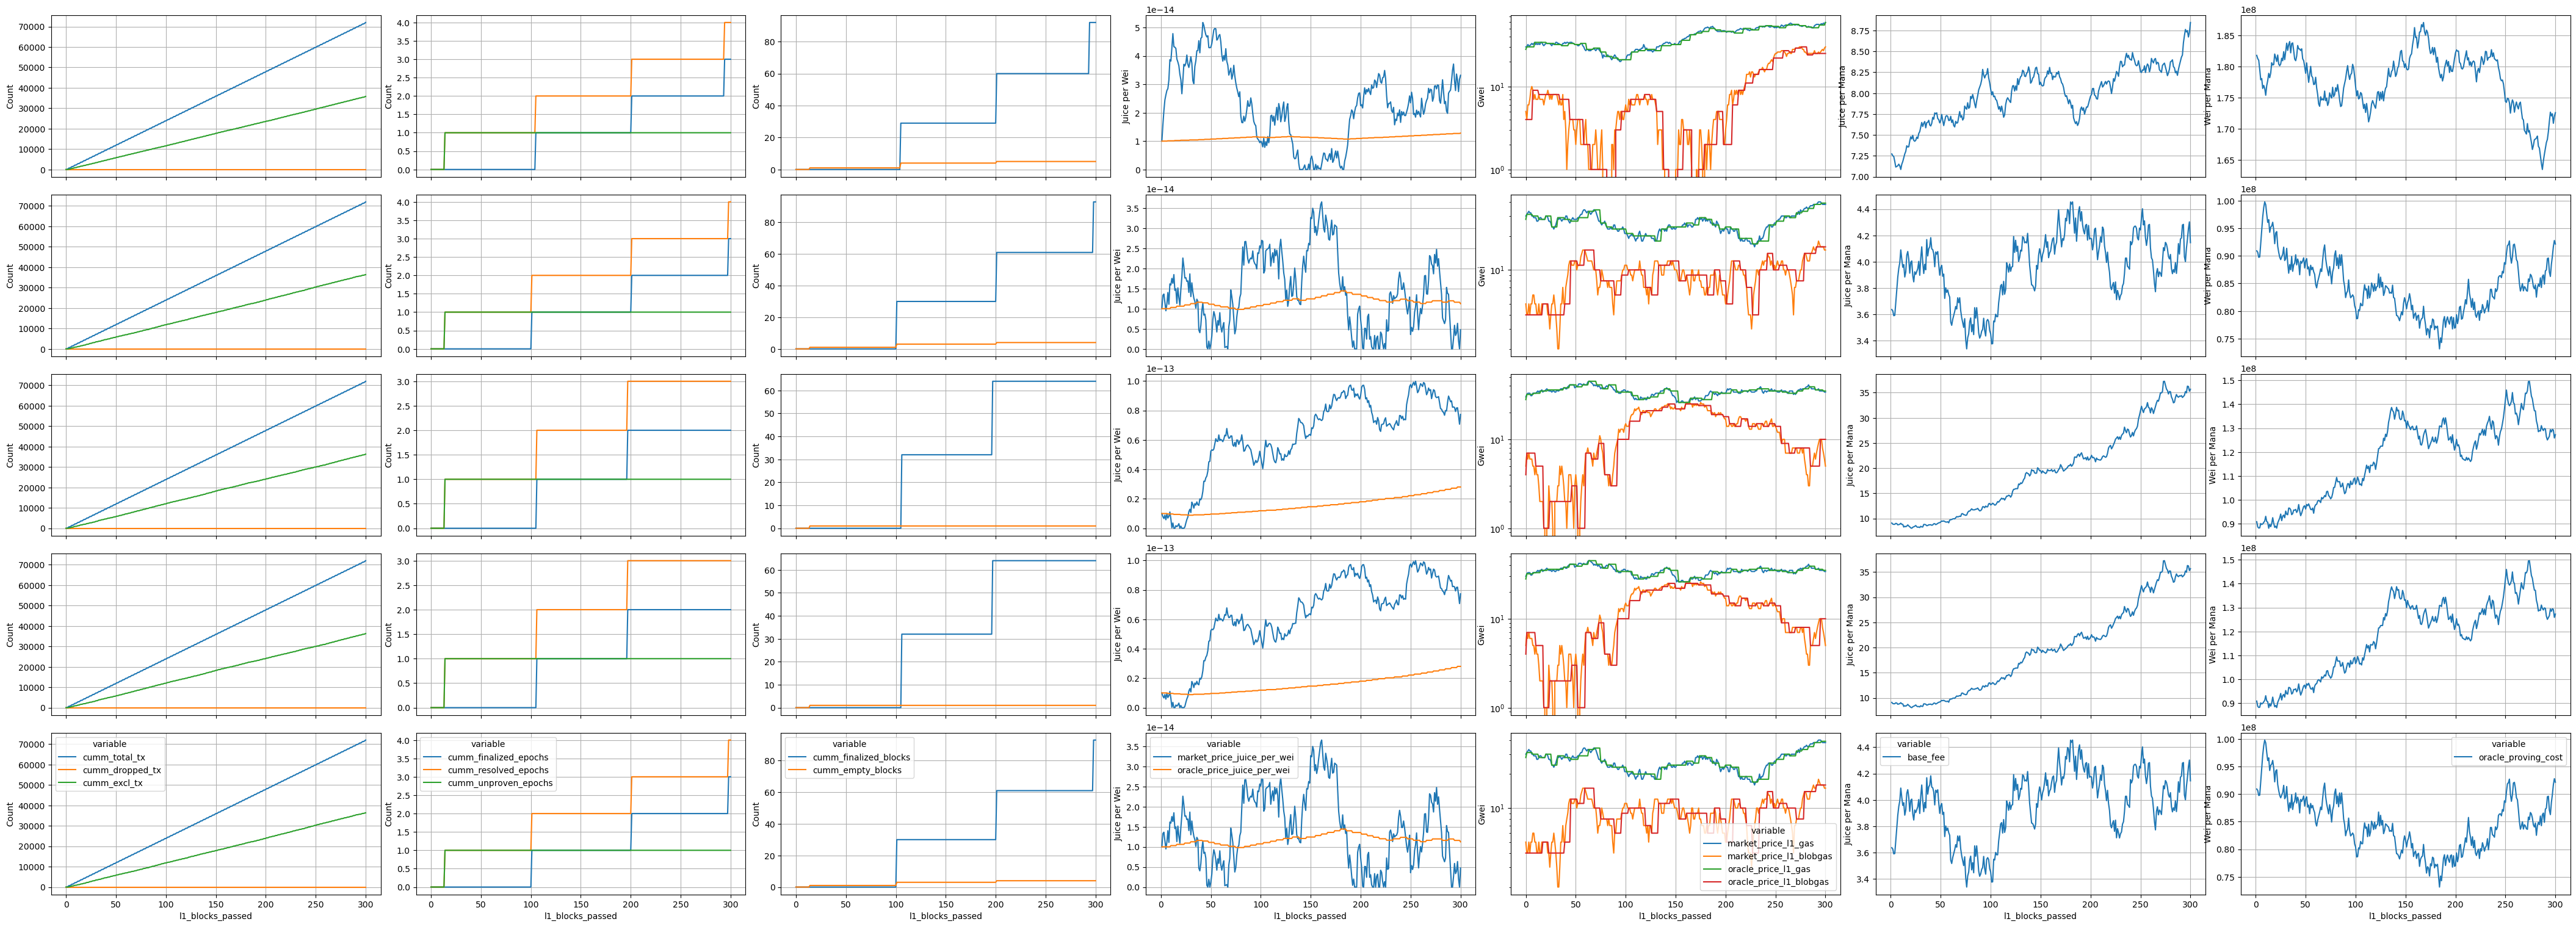

In [7]:
plot_inspect_vars(sim_df)

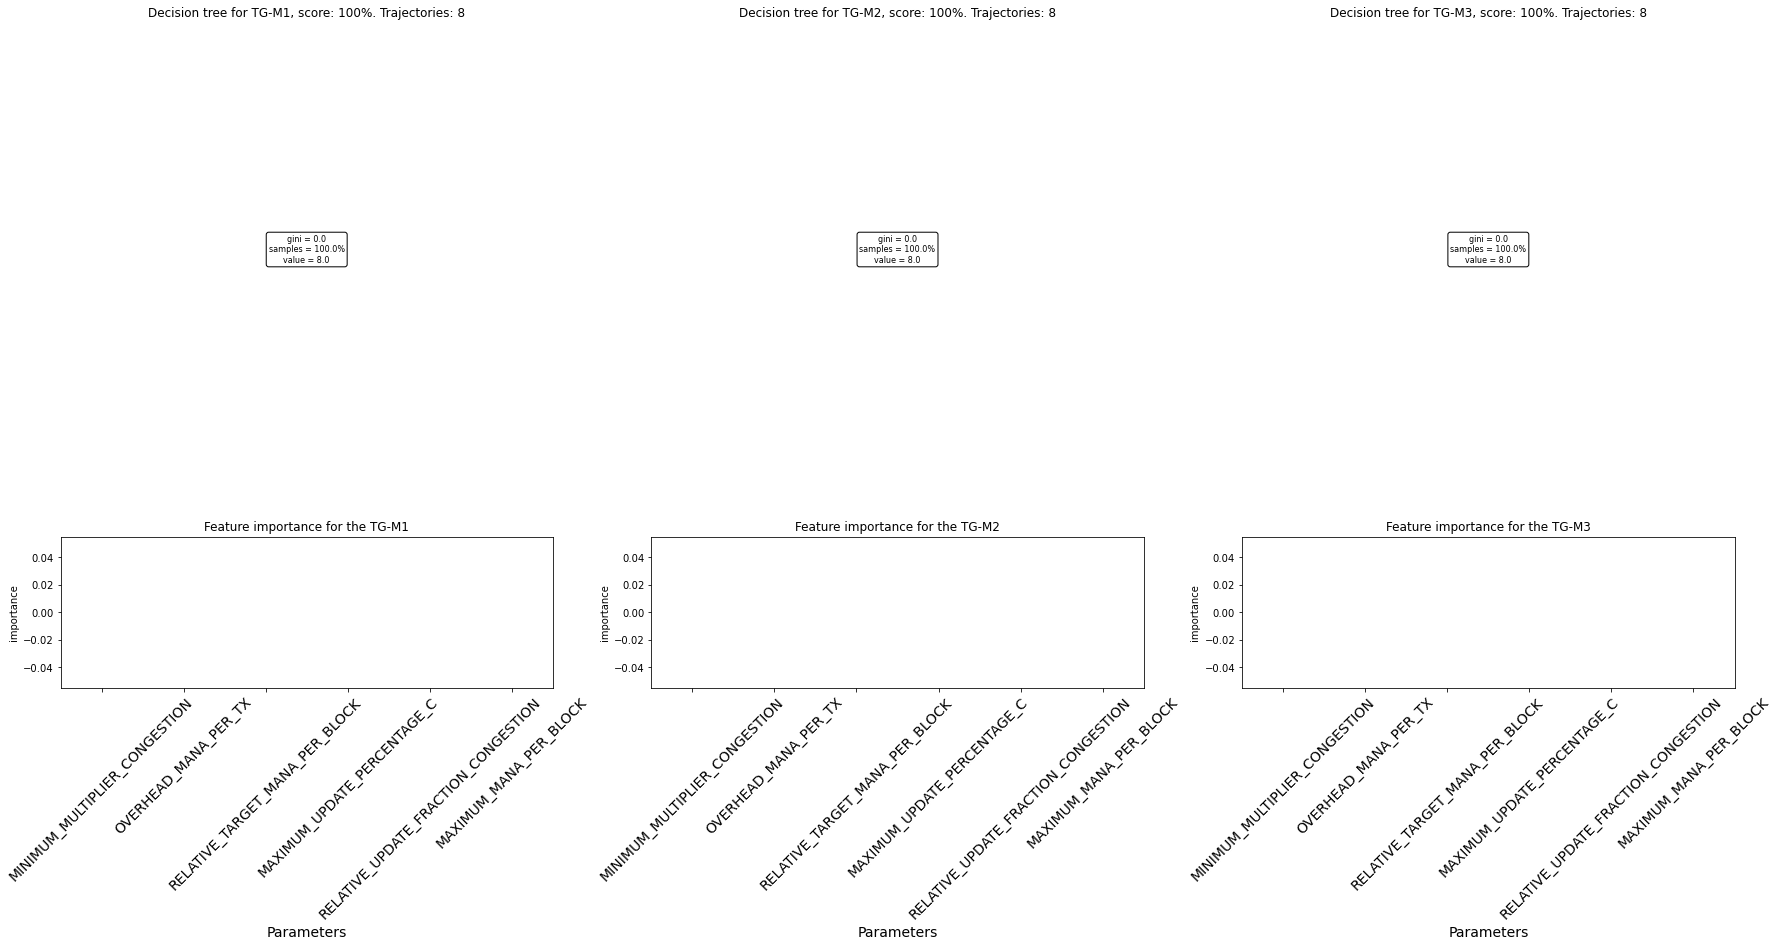

In [8]:
plot_agg_kpis(agg_df, CONTROL_PARAMS, RELEVANT_PER_TRAJECTORY_GROUP_METRICS)

### Commentary on Results:
